In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [96]:
#Usage: gene_fun(gene_name, pathways_to_each_csv_file_you_wish_to_include)
#This function can take from 1 to 7 csv files and create one scatter plot of transcription over a time course
#It would be useful if your file naming convention is malariaisolatelog2anythinghere.csv
#e.g. NHP4026log2imputedtimecourse.csv
def gene_fun(gene, *csv_files):
    #first check to make sure the gene is in every CSV file provided 
    #if the gene name has been misspelled, then the user will be notified  
    for file in csv_files:
        data_c = pd.read_csv(file)
        if gene not in data_c:
            print('Please enter correct gene name')
            return(None)
#This is the plotting function -- must be abstract to accept up to 7 csv files at once  
    color_list = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    num = 0
    been_thru = False
    for file in csv_files:
        date = pd.read_csv(file)
        #this is how to splice the malaria isolate name from the csv file name 
        top, bot = os.path.split(file)
        isolate, b =bot.split('log2')
        if not been_thru:
            pl = date.plot(kind='scatter', x='Time', y=gene, color=color_list[num], figsize = [7,7], title = gene, label = isolate)
            num += 1
            been_thru = True
        else:
            name = date.plot(kind='scatter', x='Time', y=gene, color=color_list[num], label = isolate, ax = pl)
            name.set(xlabel = 'Time (hrs)', ylabel= 'Log2 (Fold Change)')
            num += 1

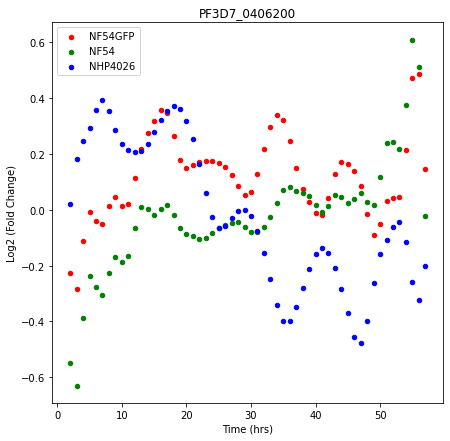

In [97]:
#here is a test of the function 
gene_fun('PF3D7_0406200', '/Users/tessmarvin/Desktop/TranscriptomePlots/time_courses/NF54GFPlog2imputedtimecourse.csv', '/Users/tessmarvin/Desktop/TranscriptomePlots/time_courses/NF54log2imputedtimecourse.csv','/Users/tessmarvin/Desktop/TranscriptomePlots/time_courses/NHP4026log2imputedtimecourse.csv')